


# Lab Course Machine Learning
# Exercise Sheet 9
January 19th, 2021

Syed Wasif Murtaza Jafri-311226

## Exercise 1: Implement Decision Tree

In [11]:
import numpy as np
import math
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from sympy import symbols, diff
import pandas as pd
import math
import warnings
import itertools
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
from scipy.spatial.distance import pdist,cdist
warnings.filterwarnings('ignore')
from itertools import combinations

In [12]:
idf = pd.read_csv('iris.data',sep=',', header=None,names=['sepal_length', 'sepal_width','petal_length', 'petal_width','Y'])
idf

,sepal_length,sepal_width,petal_length,petal_width,Y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
def splitDataframes(d):
    train, valid, test = 0.7, 0.15, 0.15



    data_train  = pd.DataFrame(columns=['sepal_length', 'sepal_width','petal_length', 'petal_width','Y'])
    data_valid  = pd.DataFrame(columns=['sepal_length', 'sepal_width','petal_length', 'petal_width','Y'])
    data_test   = pd.DataFrame(columns=['sepal_length', 'sepal_width','petal_length', 'petal_width','Y'])
#         np.unique(a, axis=0)
    classes = (d['Y'].unique())

    for c in classes:

        rowsWithc = d[d.Y == c]
        if(len(data_train)>0):
            data_train = data_train.append(rowsWithc[0:math.floor(len(rowsWithc)*0.7)])
        else:
            data_train = rowsWithc[0:math.floor(len(rowsWithc)*0.7)]
        if (len(data_valid)>0):
            data_valid = data_valid.append( rowsWithc[math.floor(len(rowsWithc)*0.7):math.floor(len(rowsWithc)*0.85)])
        else:
            data_valid = rowsWithc[math.floor(len(rowsWithc)*0.7):math.floor(len(rowsWithc)*0.85)]
        if (len(data_test)>0):
            data_test = data_test.append( rowsWithc[math.floor(len(rowsWithc)*0.85):])
        else:
            data_test = rowsWithc[math.floor(len(rowsWithc)*0.85):]
    
        
    return data_train,data_valid,data_test

In [14]:
train ,val ,test = splitDataframes(idf)

In [15]:
train['Y'].value_counts()

Iris-virginica     35
Iris-versicolor    35
Iris-setosa        35
Name: Y, dtype: int64

In [16]:
val['Y'].value_counts()

Iris-virginica     7
Iris-versicolor    7
Iris-setosa        7
Name: Y, dtype: int64

In [17]:
test['Y'].value_counts()

Iris-virginica     8
Iris-versicolor    8
Iris-setosa        8
Name: Y, dtype: int64

In [746]:
class Node:
    def __init__ (self,data: pd.DataFrame,max_depth=None,depth=None,node_type=None,question=None,min_split_data = None):
        self.data = data
        self.min_split_data = min_split_data
        self.X = data.loc[:, data.columns != 'Y']
        self.Y = data['Y']
        self.max_depth = max_depth
        self.depth = depth if depth else 0 
        self.features = list(self.X.columns)
        self.question = question
        self.node_type = node_type if node_type else 'root'
        self.left = None
        self.right = None
        self.classes = (self.Y.unique())
        self.classCount = self.Y.value_counts()
        self.classProbablities = self.classCount/len(self.data)
        self.prediction = None

    def gini_impurity():
        pass

    def bestSplit(self):
        minMCR = 1
        for f in self.features:
            typeOfFeature = self.data[f].dtype
            columData = self.data[f]
            if(typeOfFeature == 'float64'):
                columData = columData.sort_values()
                columData = columData.unique()
                averageList = [(a + b) / 2 for a, b in zip(columData[::2], columData[1::2])] # taking average of consecutive numbers
                for item in averageList: 
                    # left
                    split1 = self.data[self.data[f] < item] # for each average value divinding dataframe into two splits
                    outputCounts1 = split1['Y'].value_counts() #counting outputs for each split
                    if (len(outputCounts1)>1): # no missclassification if only one element
                        misClassCounts1 = outputCounts1.loc[~outputCounts1.index.isin([outputCounts1.idxmax()])].sum() # counting minority as misclassicfication for split 1
                    else:
                        misClassCounts1 = 0
                        
                    # right
                    split2  =self.data[self.data[f] >= item]
                    outputCounts2 = split2['Y'].value_counts()
                    if (len(outputCounts2)>1):
                        misClassCounts2 = outputCounts2.loc[~outputCounts2.index.isin([outputCounts2.idxmax()])].sum() # counting minority as misclassicfication for split 2
                    else:
                        misClassCounts2 = 0
                        
                    totalMissclass = misClassCounts1 + misClassCounts2 # adding missclassification for left and right
                    MCR = totalMissclass/len(self.data) # calculating mcr by dividing with total number of dataset

                    if(MCR<minMCR): # best split with minimum mcr
                        minMCR = MCR
                        bestFeature = f
                        bestValue = item

        print(minMCR)
        print('rule =',bestFeature ,'<', bestValue)
                
        return bestFeature,bestValue,typeOfFeature
    def entropy(self,data:pd.DataFrame):
        Y = data['Y']
        classCount = Y.value_counts()
        classProbablities = classCount/len(data)
        CE = 0
        for i in classProbablities:
            CE = CE - i*math.log(i,2)
        return CE
    

    
    def applySplit(self,bestFeature,bestValue,typeOfFeature):
        leftSplit = self.data.query(bestFeature +'<'+ str(bestValue))
        rightSplit = self.data.query(bestFeature +'>='+ str(bestValue))
        return leftSplit,rightSplit
    
    def learnDecisionTree(self):

        if (len(self.classes) > 1 and (self.depth < self.max_depth) and   len(self.data) > self.min_split_data):
            bestFeature,bestValue,typeOfFeature = self.bestSplit()
            
            self.question = bestFeature+'<'+str(bestValue)
            leftSplit,rightSplit = self.applySplit(bestFeature,bestValue,typeOfFeature)
            
            left = Node(leftSplit,5,self.depth+1,'left_node',None,5)
            self.left =  left
            self.left.learnDecisionTree()
            
            right = Node(rightSplit,5,self.depth+1,'right_node',None,5)
            self.right = right
            self.right.learnDecisionTree()
        else:
            self.prediction = self.classCount.idxmax()
            
            
    def breadth_first_search(self, root=None,width = 4 ):
        levelDict = {}
        root = self.root if root is None else root
        to_visit = [root]
        hisList = [root]
        while to_visit:
            current = to_visit.pop(0)
            const = int(current.depth * width ** 1.5)
            if(levelDict.get(current.depth)!=None ):
                    nodes = levelDict.get(current.depth)
                    nodes.append(current)
                    levelDict.update({current.depth:nodes})
            else:
                    nodes = []
                    nodes.append(current)
                    levelDict.update({current.depth:nodes})
            if(current.prediction == None):
                print(f"{'-' * const}  {current.depth} | Split rule: {current.question}")

                if current.left:
                    to_visit.append(current.left)
                    hisList.append(current.left)
                if current.right:
                    to_visit.append(current.right)
                    hisList.append(current.right)
            else:
                print(f"{'-' * const}  {current.depth} | Prediction: {current.prediction}")
                
        return hisList,levelDict
    
    def histogram(self, root=None,width = 4 ):

        root = self.root if root is None else root
        to_visit = [root]
        
        while to_visit:
            current = to_visit.pop(0)
            const = int(current.depth * width ** 1.5)
            if(current.prediction == None):
                axes = current.classProbablities.plot.bar(title= current.question + ' level:'+ str(current.depth),subplots= True)
                if current.left:
                    to_visit.append(current.left)
                if current.right:
                    to_visit.append(current.right)
            else:
                axes = current.classProbablities.plot.bar(title= current.prediction + ' level:'+ str(current.depth),subplots= True)
    def predict_Class(self, X_test:pd.DataFrame) :
      
        curNode = self
        best_feature,best_value = curNode.question.split('<')
        if (X_test[best_feature] < float(best_value)):
            if self.left is not None:
                curNode = curNode.left
        else:
            if self.right is not None:
                    curNode = curNode.right
        while curNode.depth < curNode.max_depth and (curNode.question!=None):
            best_feature,best_value = curNode.question.split('<')
            if len(curNode.Y) < curNode.min_split_data :
                break 
            if (X_test[best_feature] < float(best_value)):
                
                if self.left is not None:
                    curNode = curNode.left
            else:
                if self.right is not None:
                    curNode = curNode.right

        return curNode.prediction
    
    def predict(self, d_test:pd.DataFrame ):
        X_test = d_test.loc[:, d_test.columns != 'Y']
        Y_test = d_test['Y']
        Y_hat = []
        for index, row in X_test.iterrows():
            Y_hat.append(self.predict_Class(row))
        return (Y_hat)
        


In [747]:
root = Node(train,5,1,'root',None,5)

In [748]:
root.learnDecisionTree()

0.3333333333333333
rule = petal_length < 2.5999999999999996
0.08571428571428572
rule = petal_length < 4.85
0.030303030303030304
rule = petal_width < 1.65
0.10810810810810811
rule = sepal_length < 5.65
0.1111111111111111
rule = sepal_length < 5.75


In [749]:
Y_hat = root.predict(val)
val['Y_hat'] = Y_hat

In [750]:
histList,levelDict = root.breadth_first_search(root)

--------  1 | Split rule: petal_length<2.5999999999999996
----------------  2 | Prediction: Iris-setosa
----------------  2 | Split rule: petal_length<4.85
------------------------  3 | Split rule: petal_width<1.65
------------------------  3 | Split rule: sepal_length<5.65
--------------------------------  4 | Prediction: Iris-versicolor
--------------------------------  4 | Prediction: Iris-virginica
--------------------------------  4 | Prediction: Iris-virginica
--------------------------------  4 | Split rule: sepal_length<5.75
----------------------------------------  5 | Prediction: Iris-virginica
----------------------------------------  5 | Prediction: Iris-virginica


In [751]:

for current in histList:
    const = int(current.depth * 4 ** 1.5)
    if(current.prediction == None):
        print(f"{'-' * const}  {current.depth} | Split rule: {current.question}")
    else:
        print(f"{'-' * const}  {current.depth} | Prediction: {current.prediction}")

--------  1 | Split rule: petal_length<2.5999999999999996
----------------  2 | Prediction: Iris-setosa
----------------  2 | Split rule: petal_length<4.85
------------------------  3 | Split rule: petal_width<1.65
------------------------  3 | Split rule: sepal_length<5.65
--------------------------------  4 | Prediction: Iris-versicolor
--------------------------------  4 | Prediction: Iris-virginica
--------------------------------  4 | Prediction: Iris-virginica
--------------------------------  4 | Split rule: sepal_length<5.75
----------------------------------------  5 | Prediction: Iris-virginica
----------------------------------------  5 | Prediction: Iris-virginica


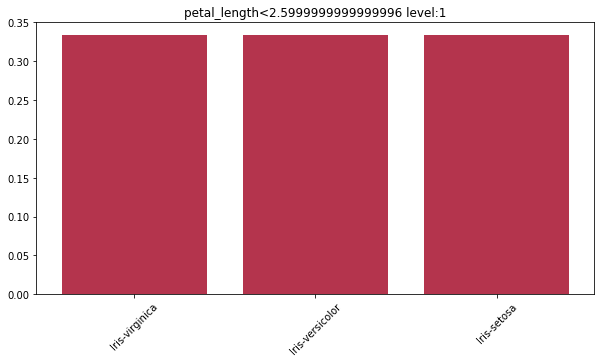

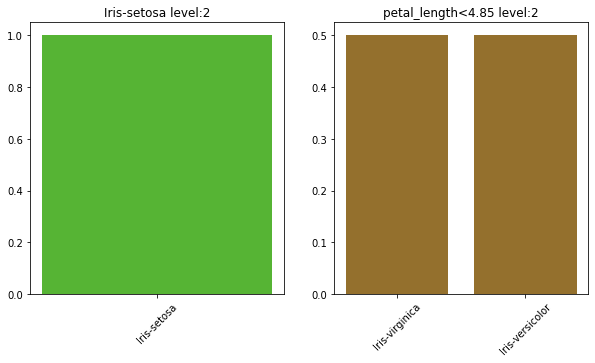

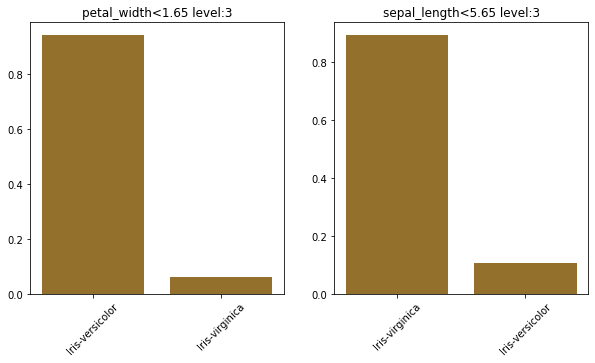

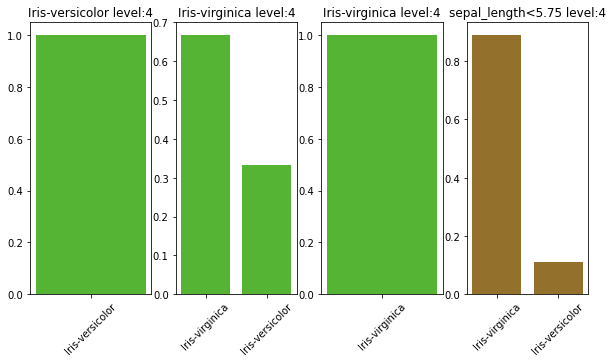

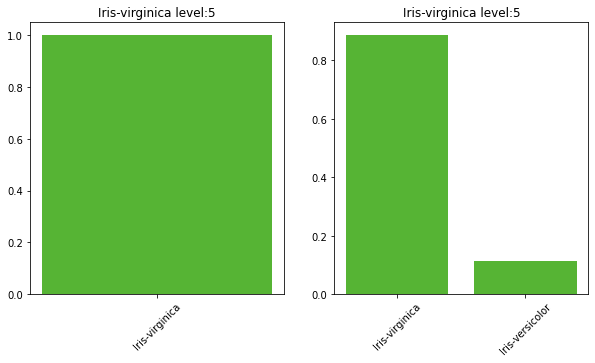

In [752]:
for i in levelDict:
    nodeList = levelDict.get(i)
    plt.figure(figsize=(10, 5))

    for n in range(len(nodeList)):
        if nodeList[n].node_type== 'root':
            ax = plt.subplot(1,len(nodeList),n+1)
            ax.bar(nodeList[n].classProbablities.index,nodeList[n].classProbablities,color='#B4344D')
            ax.title.set_text(nodeList[n].question + ' level:'+ str(nodeList[n].depth))
            ax.set_xticklabels(labels = nodeList[n].classProbablities.index,rotation=45)
        else:
            ax = plt.subplot(1,len(nodeList),n+1)
            if(nodeList[n].prediction == None):
                ax.title.set_text(nodeList[n].question + ' level:'+ str(nodeList[n].depth))
                ax.bar(nodeList[n].classProbablities.index,nodeList[n].classProbablities,color='#94702D')
                ax.set_xticklabels(labels = nodeList[n].classProbablities.index,rotation=45) 
            else:
                ax.title.set_text(nodeList[n].prediction + ' level:'+ str(nodeList[n].depth))
                ax.bar(nodeList[n].classProbablities.index,nodeList[n].classProbablities,color='#56B434')
                ax.set_xticklabels(labels = nodeList[n].classProbablities.index,rotation=45)
        
            #ax.title( ' level:'+ str(nodeList[n].depth))
    # Show/save figure as desired.
    plt.show()

In [753]:
def crossEntropy(data:pd.DataFrame):
    Y = data['Y']
    classCount = Y.value_counts()
    classProbablities = classCount/len(data)

    print(classProbablities)
    CE = 0
    for i in classProbablities:
        print (i)
        CE = CE - i*math.log(i)
        print (CE)
        
    return CE

In [754]:
CE = crossEntropy(train)
CE

Iris-virginica     0.333333
Iris-versicolor    0.333333
Iris-setosa        0.333333
Name: Y, dtype: float64
0.3333333333333333
0.3662040962227032
0.3333333333333333
0.7324081924454064
0.3333333333333333
1.0986122886681096


1.0986122886681096

In [755]:

alist = []
lst = ["a" ,"b", "c",'d','e']
print(math.ceil(len(lst)/2)+1)
lengthOfStrings = list(range(1,math.ceil(len(lst)/2)+1))
for l in (lengthOfStrings):
    for i in combinations(lst, l):
        if list(i) not in alist:
            c = [a  for a in lst if a not in i]
            alist.append(c)
            print(list(i), '-----',c )


4
['a'] ----- ['b', 'c', 'd', 'e']
['b'] ----- ['a', 'c', 'd', 'e']
['c'] ----- ['a', 'b', 'd', 'e']
['d'] ----- ['a', 'b', 'c', 'e']
['e'] ----- ['a', 'b', 'c', 'd']
['a', 'b'] ----- ['c', 'd', 'e']
['a', 'c'] ----- ['b', 'd', 'e']
['a', 'd'] ----- ['b', 'c', 'e']
['a', 'e'] ----- ['b', 'c', 'd']
['b', 'c'] ----- ['a', 'd', 'e']
['b', 'd'] ----- ['a', 'c', 'e']
['b', 'e'] ----- ['a', 'c', 'd']
['c', 'd'] ----- ['a', 'b', 'e']
['c', 'e'] ----- ['a', 'b', 'd']
['d', 'e'] ----- ['a', 'b', 'c']


### Part B: Experimenting with other Quality-criterion:

In [761]:
class Node:
    def __init__ (self,data: pd.DataFrame,max_depth=None,depth=None,node_type=None,question=None,min_split_data = None):
        self.data = data
        self.min_split_data = min_split_data
        self.X = data.loc[:, data.columns != 'Y']
        self.Y = data['Y']
        self.max_depth = max_depth
        self.depth = depth if depth else 0 
        self.features = list(self.X.columns)
        self.question = question
        self.node_type = node_type if node_type else 'root'
        self.left = None
        self.right = None
        self.classes = (self.Y.unique())
        self.classCount = self.Y.value_counts()
        self.classProbablities = self.classCount/len(self.data)
        self.prediction = None
        self.infoGain = None

    def gini_impurity():
        pass
                
        return bestFeature,bestValue,typeOfFeature
    def entropy(self,data:pd.DataFrame):
        Y = data['Y']
        classCount = Y.value_counts()
        classProbablities = classCount/len(data)
        CE = 0
        for i in classProbablities:
            CE = CE - i*math.log(i,2)
        return CE
    
    def bestSplitInfoGrain(self):
        infoGainBest = 0
        CE_data = self.entropy(self.data)
        for f in self.features:
            typeOfFeature = self.data[f].dtype
            columData = self.data[f]
            if(typeOfFeature == 'float64'):
                columData = columData.sort_values()
                columData = columData.unique()
                averageList = [(a + b) / 2 for a, b in zip(columData[::2], columData[1::2])] # taking average of consecutive numbers
                for item in averageList: 
                    # left
                    split1 = self.data[self.data[f] < item] # for each average value divinding dataframe into two splits
                        
                    # right
                    split2  =self.data[self.data[f] >= item]

                        
                    infoGain = CE_data-((len(split1)/len(self.data))*(self.entropy(split1)))-((len(split2)/len(self.data))*(self.entropy(split2)))
                    
                    if(infoGain>infoGainBest): # best split with minimum mcr
                        infoGainBest = infoGain
                        bestFeature = f
                        bestValue = item

        print(infoGainBest)
        print('rule =',bestFeature ,'<', bestValue)
                
        return bestFeature,bestValue,typeOfFeature,infoGainBest
    
    def applySplit(self,bestFeature,bestValue,typeOfFeature):
        leftSplit = self.data.query(bestFeature +'<'+ str(bestValue))
        rightSplit = self.data.query(bestFeature +'>='+ str(bestValue))
        return leftSplit,rightSplit
    
    def learnDecisionTree(self):

        if (len(self.classes) > 1 and (self.depth < self.max_depth) and   len(self.data) > self.min_split_data):
            bestFeature,bestValue,typeOfFeature,infoGainBest = self.bestSplitInfoGrain()
            
            self.question = bestFeature+'<'+str(bestValue)
            self.infoGain = infoGainBest
            leftSplit,rightSplit = self.applySplit(bestFeature,bestValue,typeOfFeature)
            
            left = Node(leftSplit,5,self.depth+1,'left_node',None,5)
            self.left =  left
            self.left.learnDecisionTree()
            
            right = Node(rightSplit,5,self.depth+1,'right_node',None,5)
            self.right = right
            self.right.learnDecisionTree()
        else:
            self.prediction = self.classCount.idxmax()
            
            
    def breadth_first_search(self, root=None,width = 4 ):
        levelDict = {}
        root = self.root if root is None else root
        to_visit = [root]
        hisList = [root]
        while to_visit:
            current = to_visit.pop(0)
            const = int(current.depth * width ** 1.5)
            if(levelDict.get(current.depth)!=None ):
                    nodes = levelDict.get(current.depth)
                    nodes.append(current)
                    levelDict.update({current.depth:nodes})
            else:
                    nodes = []
                    nodes.append(current)
                    levelDict.update({current.depth:nodes})
            if(current.prediction == None):
                print(f"{'-' * const}  {current.depth} | Split rule: {current.question}")

                if current.left:
                    to_visit.append(current.left)
                    hisList.append(current.left)
                if current.right:
                    to_visit.append(current.right)
                    hisList.append(current.right)
            else:
                print(f"{'-' * const}  {current.depth} | Prediction: {current.prediction}")
                
        return hisList,levelDict
    
    def histogram(self, root=None,width = 4 ):

        root = self.root if root is None else root
        to_visit = [root]
        
        while to_visit:
            current = to_visit.pop(0)
            const = int(current.depth * width ** 1.5)
            if(current.prediction == None):
                axes = current.classProbablities.plot.bar(title= current.question + ' level:'+ str(current.depth),subplots= True)
                if current.left:
                    to_visit.append(current.left)
                if current.right:
                    to_visit.append(current.right)
            else:
                axes = current.classProbablities.plot.bar(title= current.prediction + ' level:'+ str(current.depth),subplots= True)
    def predict_Class(self, X_test:pd.DataFrame) :
      
        curNode = self
        best_feature,best_value = curNode.question.split('<')
        if (X_test[best_feature] < float(best_value)):
            if self.left is not None:
                curNode = curNode.left
        else:
            if self.right is not None:
                    curNode = curNode.right
        while curNode.depth < curNode.max_depth and (curNode.question!=None):
            best_feature,best_value = curNode.question.split('<')
            if len(curNode.Y) < curNode.min_split_data :
                break 
            if (X_test[best_feature] < float(best_value)):
                
                if self.left is not None:
                    curNode = curNode.left
            else:
                if self.right is not None:
                    curNode = curNode.right

        return curNode.prediction
    
    def predict(self, d_test:pd.DataFrame ):
        X_test = d_test.loc[:, d_test.columns != 'Y']
        Y_test = d_test['Y']
        Y_hat = []
        for index, row in X_test.iterrows():
            Y_hat.append(self.predict_Class(row))
        return (Y_hat)
        


In [795]:
root = Node(train,5,1,'root',None,5)
a =[]
a.append(root)

In [796]:
root.learnDecisionTree()

0.9182958340544894
rule = petal_length < 2.5999999999999996
0.5832901584817427
rule = petal_length < 4.85
0.2463646307476473
rule = petal_width < 1.65
0.181307493691589
rule = petal_length < 5.199999999999999
0.46666279373280384
rule = petal_width < 1.75


In [764]:
Y_hat = root.predict(val)
val['Y_hat'] = Y_hat

In [765]:
histList,levelDict = root.breadth_first_search(root)

--------  1 | Split rule: petal_length<2.5999999999999996
----------------  2 | Prediction: Iris-setosa
----------------  2 | Split rule: petal_length<4.85
------------------------  3 | Split rule: petal_width<1.65
------------------------  3 | Split rule: petal_length<5.199999999999999
--------------------------------  4 | Prediction: Iris-versicolor
--------------------------------  4 | Prediction: Iris-virginica
--------------------------------  4 | Split rule: petal_width<1.75
--------------------------------  4 | Prediction: Iris-virginica
----------------------------------------  5 | Prediction: Iris-versicolor
----------------------------------------  5 | Prediction: Iris-virginica


In [766]:
questionList = []
infoGainList = []
for current in histList:
    const = int(current.depth * 4 ** 1.5)
    if(current.prediction == None):
        print(f"{'-' * const}  {current.depth} | Split rule: {current.question} | infoGain: {current.infoGain}")
        questionList.append(current.question)
        infoGainList.append(current.infoGain)
    else:
        print(f"{'-' * const}  {current.depth} | Prediction: {current.prediction}")

--------  1 | Split rule: petal_length<2.5999999999999996 | infoGain: 0.9182958340544894
----------------  2 | Prediction: Iris-setosa
----------------  2 | Split rule: petal_length<4.85 | infoGain: 0.5832901584817427
------------------------  3 | Split rule: petal_width<1.65 | infoGain: 0.2463646307476473
------------------------  3 | Split rule: petal_length<5.199999999999999 | infoGain: 0.181307493691589
--------------------------------  4 | Prediction: Iris-versicolor
--------------------------------  4 | Prediction: Iris-virginica
--------------------------------  4 | Split rule: petal_width<1.75 | infoGain: 0.46666279373280384
--------------------------------  4 | Prediction: Iris-virginica
----------------------------------------  5 | Prediction: Iris-versicolor
----------------------------------------  5 | Prediction: Iris-virginica


Text(0.5, 1.0, 'Information gain at each decision')

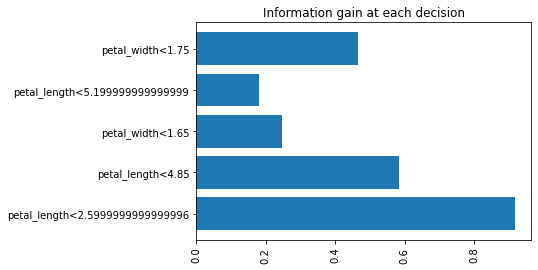

In [775]:
plt.barh(questionList,infoGainList)
plt.xticks(rotation=90)
plt.title('Information gain at each decision')

## Exercise 2: Gradient Boosted Decision Trees

In [1257]:
from sklearn.datasets import make_moons


In [1258]:
X, y = make_moons(random_state=0)

In [1259]:
df = pd.DataFrame(X, columns = ['x1','x2'])
df['Y'] = y

In [1260]:
df

,x1,x2,Y
0,-0.096023,0.995379,0
1,1.672301,-0.240278,1
2,0.991790,0.127877,0
3,0.050944,0.184892,1
4,1.032052,-0.499486,1
...,...,...,...
95,1.981559,0.308841,1
96,0.537462,-0.386599,1
97,0.376510,-0.281831,1
98,-0.991790,0.127877,0


In [1261]:
def splitDataframes(d):
    train, valid, test = 0.7, 0.15, 0.15



    data_train  = pd.DataFrame(columns=['x1', 'x2','Y'])
    data_valid  = pd.DataFrame(columns=['x1', 'x2','Y'])
    data_test   = pd.DataFrame(columns=['x1', 'x2','Y'])
#         np.unique(a, axis=0)
    classes = (d['Y'].unique())

    for c in classes:

        rowsWithc = d[d.Y == c]
        if(len(data_train)>0):
            data_train = data_train.append(rowsWithc[0:math.floor(len(rowsWithc)*0.7)])
        else:
            data_train = rowsWithc[0:math.floor(len(rowsWithc)*0.7)]
        if (len(data_valid)>0):
            data_valid = data_valid.append( rowsWithc[math.floor(len(rowsWithc)*0.7):math.floor(len(rowsWithc)*0.85)])
        else:
            data_valid = rowsWithc[math.floor(len(rowsWithc)*0.7):math.floor(len(rowsWithc)*0.85)]
        if (len(data_test)>0):
            data_test = data_test.append( rowsWithc[math.floor(len(rowsWithc)*0.85):])
        else:
            data_test = rowsWithc[math.floor(len(rowsWithc)*0.85):]
    
        
    return data_train,data_valid,data_test

In [1262]:
train ,val ,test = splitDataframes(df)

In [1263]:
train= df[0:70]
train['Y'].value_counts()

0    36
1    34
Name: Y, dtype: int64

In [1293]:
class Node:
    def __init__ (self,data: pd.DataFrame,max_depth=None,depth=None,node_type=None,question=None,min_split_data = None,outputCol= None,previousProbablities= None):
        self.outputCol = outputCol
        self.data = data
        self.min_split_data = min_split_data
        self.X = data.iloc[:, 0:2]
        self.Y = data[self.outputCol]
        self.max_depth = max_depth
        self.depth = depth if depth else 0 
        self.features = list(self.X.columns)
        self.question = question
        self.node_type = node_type if node_type else 'root'
        self.left = None
        self.right = None
        self.classes = (self.Y.unique())
        self.classCount = self.Y.value_counts()
        self.classProbablities = self.classCount/len(self.data)
        self.prediction = None
        self.infoGain = None
        self.previousProbablities = previousProbablities
        self.predictedProbablities = None
        

    def gini_impurity():
        pass
                
        return bestFeature,bestValue,typeOfFeature
    def entropy(self,data:pd.DataFrame):
        Y = data[self.outputCol]
        classCount = Y.value_counts()
        classProbablities = classCount/len(data)
        CE = 0
        for i in classProbablities:
            CE = CE - i*math.log(i,2)
        return CE
    
    def bestSplitInfoGrain(self):
        infoGainBest = 0
        CE_data = self.entropy(self.data)
        for f in self.features:
            typeOfFeature = self.data[f].dtype
            columData = self.data[f]
            if(typeOfFeature == 'float64'):
                columData = columData.sort_values()
                columData = columData.unique()
                averageList = [(a + b) / 2 for a, b in zip(columData[::2], columData[1::2])] # taking average of consecutive numbers
                for item in averageList: 
                    # left
                    split1 = self.data[self.data[f] < item] # for each average value divinding dataframe into two splits
                        
                    # right
                    split2  =self.data[self.data[f] >= item]

                        
                    infoGain = CE_data-((len(split1)/len(self.data))*(self.entropy(split1)))-((len(split2)/len(self.data))*(self.entropy(split2)))
                    
                    if(infoGain>infoGainBest): # best split with minimum mcr
                        infoGainBest = infoGain
                        bestFeature = f
                        bestValue = item

        print(infoGainBest)
        print('rule =',bestFeature ,'<', bestValue)
                
        return bestFeature,bestValue,typeOfFeature,infoGainBest
    
    def applySplit(self,bestFeature,bestValue,typeOfFeature):
        leftSplit = self.data.query(bestFeature +'<'+ str(bestValue))
        rightSplit = self.data.query(bestFeature +'>='+ str(bestValue))
        return leftSplit,rightSplit
    
    def learnDecisionTree(self,previousProbablities=None):
        if(self.node_type== 'root'):
            self.data['previousProbablities'] = previousProbablities
        if(self.node_type == 'firstTree'):
            self.prediction = self.classCount.idxmax()
            predictedProbablities = []
            for i in self.Y:
                predictedProbablities.append(self.classProbablities[i])
            self.predictedProbablities = predictedProbablities
            
        elif (len(self.classes) > 1 and (self.depth < self.max_depth) and   len(self.data) > self.min_split_data):
            bestFeature,bestValue,typeOfFeature,infoGainBest = self.bestSplitInfoGrain()
            
            self.question = bestFeature+'<'+str(bestValue)
            self.infoGain = infoGainBest
            leftSplit,rightSplit = self.applySplit(bestFeature,bestValue,typeOfFeature)
            
            left = Node(leftSplit,self.max_depth,self.depth+1,'left_node',None,5,self.outputCol,self.previousProbablities)
            self.left =  left
            self.left.learnDecisionTree()
            
            right = Node(rightSplit,self.max_depth,self.depth+1,'right_node',None,5,self.outputCol,self.previousProbablities)
            self.right = right
            self.right.learnDecisionTree()
        else:
            numSum = 0
            dumSum = 0
            for index, row in self.data.iterrows():
                numSum = numSum + row['residual']
                dumSum = dumSum + (row['previousProbablities'])
        
            self.prediction = numSum/dumSum
            
            
    def breadth_first_search(self, root=None,width = 4 ):
        levelDict = {}
        root = self.root if root is None else root
        to_visit = [root]
        hisList = [root]
        while to_visit:
            current = to_visit.pop(0)
            const = int(current.depth * width ** 1.5)
            if(levelDict.get(current.depth)!=None ):
                    nodes = levelDict.get(current.depth)
                    nodes.append(current)
                    levelDict.update({current.depth:nodes})
            else:
                    nodes = []
                    nodes.append(current)
                    levelDict.update({current.depth:nodes})
            if(current.prediction == None):
                print(f"{'-' * const}  {current.depth} | Split rule: {current.question}")

                if current.left:
                    to_visit.append(current.left)
                    hisList.append(current.left)
                if current.right:
                    to_visit.append(current.right)
                    hisList.append(current.right)
            else:
                print(f"{'-' * const}  {current.depth} | Prediction: {current.prediction}")
                
        return hisList,levelDict
    
    def histogram(self, root=None,width = 4 ):

        root = self.root if root is None else root
        to_visit = [root]
        
        while to_visit:
            current = to_visit.pop(0)
            const = int(current.depth * width ** 1.5)
            if(current.prediction == None):
                axes = current.classProbablities.plot.bar(title= current.question + ' level:'+ str(current.depth),subplots= True)
                if current.left:
                    to_visit.append(current.left)
                if current.right:
                    to_visit.append(current.right)
            else:
                axes = current.classProbablities.plot.bar(title= current.prediction + ' level:'+ str(current.depth),subplots= True)
    def predict_Class(self, X_test:pd.DataFrame) :
        curNode = self
        if(self.node_type == 'firstTree'):
            return curNode.prediction
       
        best_feature,best_value = curNode.question.split('<')
        if (X_test[best_feature] < float(best_value)):
            if self.left is not None:
                curNode = curNode.left
        else:
            if self.right is not None:
                    curNode = curNode.right
        while curNode.depth < curNode.max_depth and (curNode.question!=None):
            best_feature,best_value = curNode.question.split('<')
            if len(curNode.Y) < curNode.min_split_data :
                break 
            if (X_test[best_feature] < float(best_value)):
                
                if self.left is not None:
                    curNode = curNode.left
            else:
                if self.right is not None:
                    curNode = curNode.right

        return curNode.prediction
    
    def predict(self, d_test:pd.DataFrame ,learningRate):
        if(self.node_type == 'firstTree'):
            X_test = d_test.iloc[:, 0:2]
            Y_test = d_test['Y']
            Y_hat = []
            for index, row in X_test.iterrows():
                Y_hat.append(self.predict_Class(row))
            return (Y_hat)
        else:
            X_test = d_test.iloc[:, 0:2]
            Y_test = d_test[self.outputCol]
            predictedProbablities = []
            for index, row in d_test.iterrows():
                
                logOdd = row['previousProbablities'] + (learningRate *self.predict_Class(row))
                predictionProb = math.exp(logOdd)/(1+math.exp(logOdd))
                predictedProbablities.append(predictionProb)
                
            self.predictedProbablities = predictedProbablities
            print(np.array(predictedProbablities).sum())
            return (predictedProbablities)
    

In [1294]:
listOfTrees =  []
predictedProbablities=[]
firstTree = Node(train,2,1,'firstTree',None,5,'Y',predictedProbablities)
firstTree.learnDecisionTree(predictedProbablities)

In [1295]:
firstTree.classCount

0    36
1    34
Name: Y, dtype: int64

In [1296]:
len (firstTree.predictedProbablities)

70

In [1297]:
listOfTrees.append(firstTree)


In [1298]:
Y_hat = firstTree.predict(train,0.2)
firstTree.classProbablities

0    0.514286
1    0.485714
Name: Y, dtype: float64

In [1299]:
residual = []
predictedProbablities = []
for i,j in zip(train['Y'],Y_hat):
    residual.append(i-firstTree.classProbablities[j])
    predictedProbablities.append(firstTree.classProbablities[j])

In [1300]:
train['residual'] = residual
train['predictedProbablities'] = predictedProbablities

In [1301]:
train

,x1,x2,Y,residual,predictedProbablities,previousProbablities
0,-0.096023,0.995379,0,-0.514286,0.514286,0.597095
1,1.672301,-0.240278,1,0.485714,0.514286,0.684788
2,0.991790,0.127877,0,-0.514286,0.514286,0.618081
3,0.050944,0.184892,1,0.485714,0.514286,0.669787
4,1.032052,-0.499486,1,0.485714,0.514286,0.684788
...,...,...,...,...,...,...
65,1.623490,-0.281831,1,0.485714,0.514286,0.684788
66,-0.462538,0.886599,0,-0.514286,0.514286,0.597095
67,1.572117,-0.320172,1,0.485714,0.514286,0.684788
68,0.623490,0.781831,0,-0.514286,0.514286,0.597095


In [1302]:
numberofTree = 5
learningRate = 0.2
for i in range(1,5):
    
    tree = Node(train,2,1,'root',None,5,'residual',listOfTrees[i-1].predictedProbablities)
    tree.learnDecisionTree(predictedProbablities)
    predictedProbablities = tree.predict(tree.data,learningRate)
    train['predictedProbablities'] = predictedProbablities
    residual = []
    for i,j in zip(train['Y'],predictedProbablities):
        residual.append(i-j)
    train['residual'] = residual   
    listOfTrees.append(tree)
    
    

0.40783647581206334
rule = x2 < 0.25
43.585290585256146
0.9994110647387553
rule = x2 < 0.25
44.720021370368016
0.9994110647387553
rule = x2 < 0.25
44.924161200606065
0.9994110647387553
rule = x2 < 0.25
44.9630740392363


In [1303]:
for l in listOfTrees:
    print('----------------Tree-----------------')
    histList,levelDict = l.breadth_first_search(l)

----------------Tree-----------------
--------  1 | Prediction: 0
----------------Tree-----------------
--------  1 | Split rule: x2<0.25
----------------  2 | Prediction: 0.6584967320261441
----------------  2 | Prediction: -0.7299382716049385
----------------Tree-----------------
--------  1 | Split rule: x2<0.25
----------------  2 | Prediction: 0.30000685858020293
----------------  2 | Prediction: -0.7650123722212955
----------------Tree-----------------
--------  1 | Split rule: x2<0.25
----------------  2 | Prediction: 0.2697318345917814
----------------  2 | Prediction: -0.7714865805036665
----------------Tree-----------------
--------  1 | Split rule: x2<0.25
----------------  2 | Prediction: 0.2657543595677741
----------------  2 | Prediction: -0.7728606934477926


,x1,x2,Y,residual,predictedProbablities,previousProbablities
0,-0.096023,0.995379,0,-0.598273,0.598273,0.598274
1,1.672301,-0.240278,1,0.314969,0.685031,0.685031
2,0.991790,0.127877,0,-0.618496,0.618496,0.618498
3,0.050944,0.184892,1,0.329840,0.670160,0.670160
4,1.032052,-0.499486,1,0.314969,0.685031,0.685031
...,...,...,...,...,...,...
65,1.623490,-0.281831,1,0.314969,0.685031,0.685031
66,-0.462538,0.886599,0,-0.598273,0.598273,0.598274
67,1.572117,-0.320172,1,0.314969,0.685031,0.685031
68,0.623490,0.781831,0,-0.598273,0.598273,0.598274
